In [46]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np

In [60]:
def plot_eachlayer(model_name):
    timescale = scipy.stats.invgamma.isf(np.linspace(0, 1, 1151), a=0.56, scale=1)[1:]

    for layer in range(0, 3):

        fig, ax = plt.subplots(figsize=(6, 4))
        x = np.load('%s_timescale_layer_%d_output.npy' % (model_name, layer+1))

        ax.plot((x), label='Estimated', linewidth=3);
        if layer==1: ax.plot((timescale), 'r', label='Assigned', linewidth=3);
        ax.set_xlabel('Units')
        ax.set_ylabel('Timescale (T)')
        ax.set_yscale('log')

        for item in ([ax.title, ax.xaxis.label,
                      ax.yaxis.label] + ax.legend().get_texts() + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(18)
        ax.set_title(model_name+' layer:'+str(layer))
    plt.tight_layout()
    plt.savefig('Estimated_timescale_invgamma.eps', format='eps')
    plt.savefig('Estimated_timescale_invgamma.png')

In [61]:
def plot_all_layer(model_name):
    y = []
    for layer in range(3):
        x = np.load('%s_timescale_layer_%d_output.npy' % (model_name, layer+1))
        y += np.ravel(x).tolist()

    fig, ax = plt.subplots(figsize=(6,4))
    print(np.sort(y))
    ax.plot(np.sort(y)[::-1],color='r',linewidth=3);
    x2 = (scipy.stats.invgamma.isf(np.linspace(0, 1, 2701),a=1.4,scale=1)[1:]);
    ax.plot(x2,'b--',label='alpha = 1.4')
    ax.set_title('Layer:%d'%(layer+1))

    for item in ([ax.xaxis.label, ax.yaxis.label, ax.title] +ax.get_xticklabels() + ax.get_yticklabels()):
                    item.set_fontsize(18)


    plt.xlabel('Units (sorted in the order of decreasing '+r'$T_{est}$)')
    plt.ylabel('Estimated Timescale ('+r'$T_{est}$'+')')
    plt.yscale('log')
    plt.legend()

    #plt.title('Timescale distribution across all the LSTM units')
    plt.tight_layout()  
    plt.savefig('Baseline_timescale_est.eps',format='eps')
    plt.savefig('Baseline_timescale_est.png')
    plt.title(model_name)

    #fig.savefig(model_name+'_ptb_timescale_dist.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


MTS models: PTB-mts


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


MTS models: WT2-mts


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Baseline models:  PTB
[ 0.31919137  0.34143239  0.34235427 ... 86.07100677 88.78896332
 88.83033752]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Baseline models:  WT2
[  0.24898629   0.2492076    0.26376805 ... 183.86454773 198.6971283
 205.91218567]


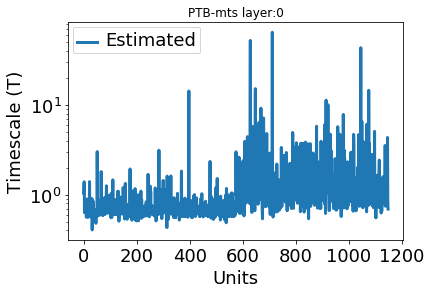

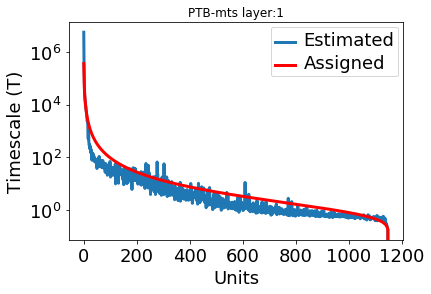

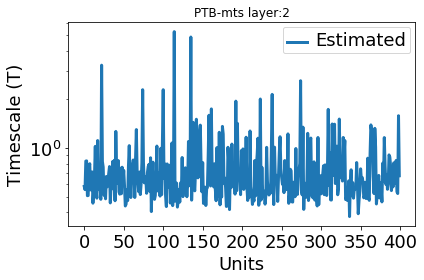

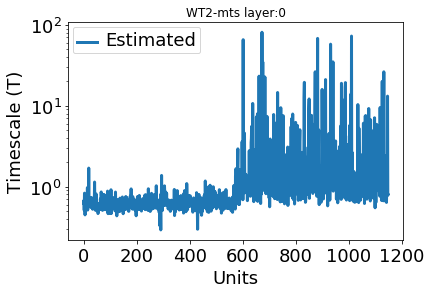

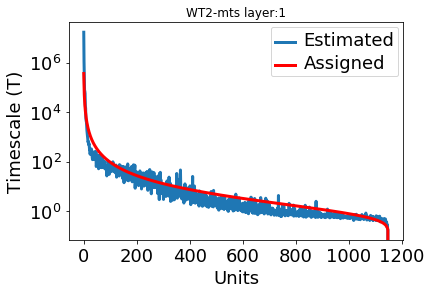

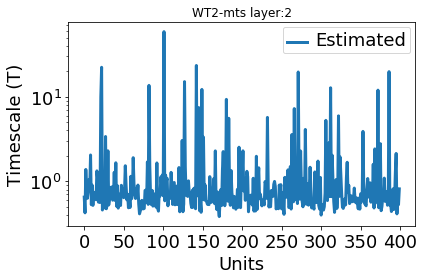

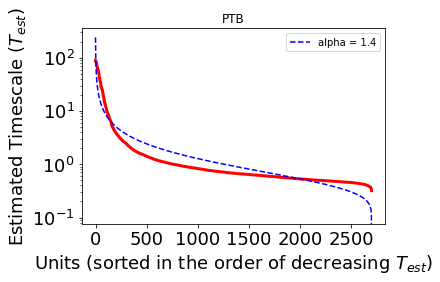

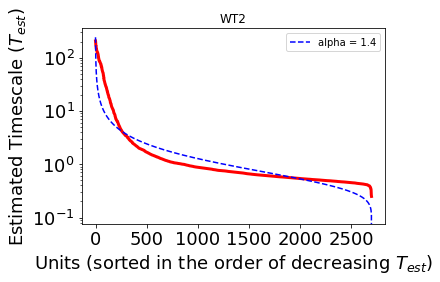

In [64]:
for model_name in ["PTB-mts","WT2-mts"]:
    print('MTS models:', model_name)
    plot_eachlayer(model_name)
for model_name in ["PTB" ,"WT2"]:
    print('Baseline models: ',model_name)
    plot_all_layer(model_name)

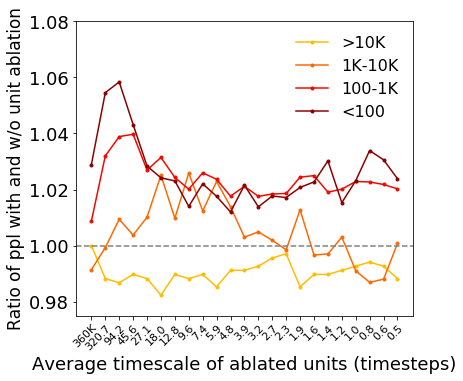

In [66]:
bin1 = np.load('unit_ablation/bin1.txt.npy')
bin2 = np.load('unit_ablation/bin2.txt.npy')
bin3 = np.load('unit_ablation/bin3.txt.npy')
bin4 = np.load('unit_ablation/bin4.txt.npy')
fig, ax = plt.subplots(1,1, figsize=(6.4,5.4))
xticks = np.arange(0,len(bin1))
timescale = ((scipy.stats.invgamma.isf(np.linspace(0, 1, 1151),a=0.56,scale=1)[1:]));

#xticklabels = np.array(["{:.0e}".format(x) for x in timescale[50*xticks]])
xticklabels = np.array(['{:2.1f}'.format(x) for x in timescale[50*xticks]])
xticklabels[0] ='360K'
from matplotlib import cm

colors = [ cm.jet(x) for x in [0.71,0.8,0.9,0.99] ]

ax.plot(bin1,'.-', color=colors[0],label='>10K')
ax.plot(bin2,'.-', color=colors[1],label='1K-10K')
ax.plot(bin3,'.-', color=colors[2],label='100-1K')
ax.plot(bin4,'.-', color=colors[3],label='<100')
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_ylim([0.975 ,1.08])
ax.set_xlabel('Average timescale of ablated units (timesteps)')

#Location of ablated chunk of 50 units from left(high timescale) to right(low timescale)
ax.set_ylabel('Ratio of ppl with and w/o unit ablation')
#ax.set_title('Change in ppx across different frequency bins vs. location of ablated chunk')
ax.legend(fontsize = 16,frameon=False)
#ax.set_axis_bgcolor('white')
#ax.grid(color='0.85')
ax.axhline(y=1,color='gray',linestyle='--')
for item in ([ax.title, ax.xaxis.label] +ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
ax.yaxis.label.set_fontsize(17)
plt.setp(ax.get_xticklabels(), fontsize=11, rotation=45, ha="right",rotation_mode="anchor")
fig.tight_layout()  
fig.savefig('frequency_bins_'+'ptb'+'.eps',format='eps')
fig.savefig('frequency_bins_'+'ptb'+'.png') #frequency_bins_wiki